In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#Módulos de interpretabilidad
import lime
import lime.lime_tabular
import shap

#Módulos de modelos
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Módulos de evaluación de modelos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import f1_score, precision_score, recall_score

In [45]:
df = pd.read_csv('data/walmart_cleaned.csv',parse_dates=True, index_col='Date')
df

,Unnamed: 0,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,,
2010-02-05,0,1,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2010-02-05,1,1,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2010-02-05,2,1,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2010-02-05,3,1,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2010-02-05,4,1,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,423281,45,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
2012-10-26,423282,45,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
2012-10-26,423283,45,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


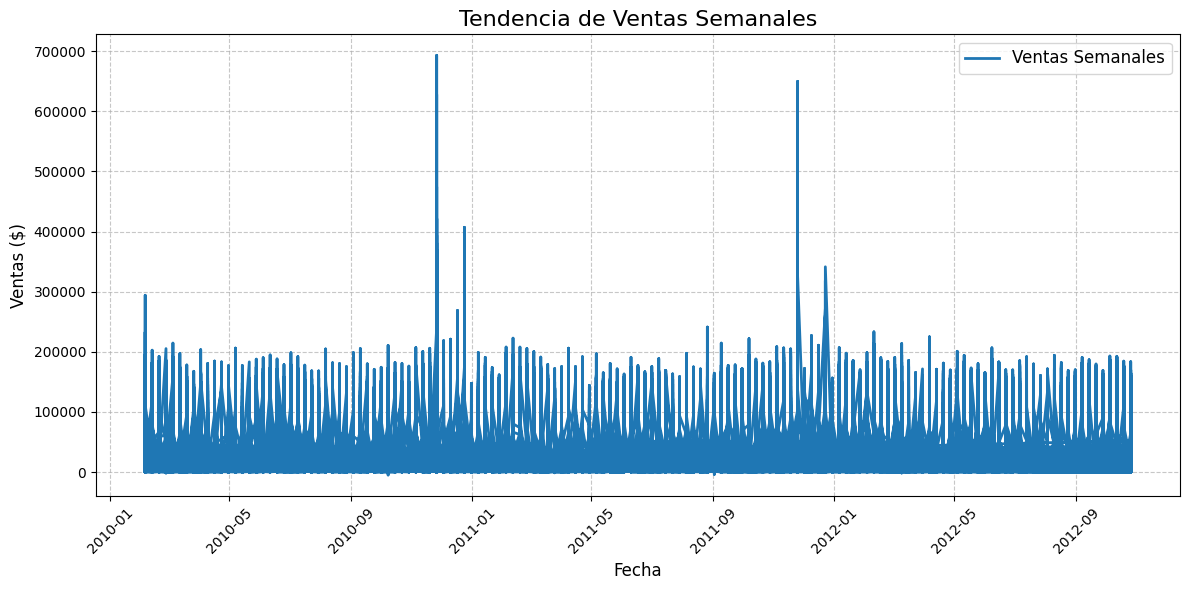

In [31]:
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico
plt.plot(df.index, df['Weekly_Sales'], label='Ventas Semanales', linewidth=2)

# Agregar etiquetas y título
plt.title('Tendencia de Ventas Semanales', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas ($)', fontsize=12)

# Mejorar la visualización
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si son fechas
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

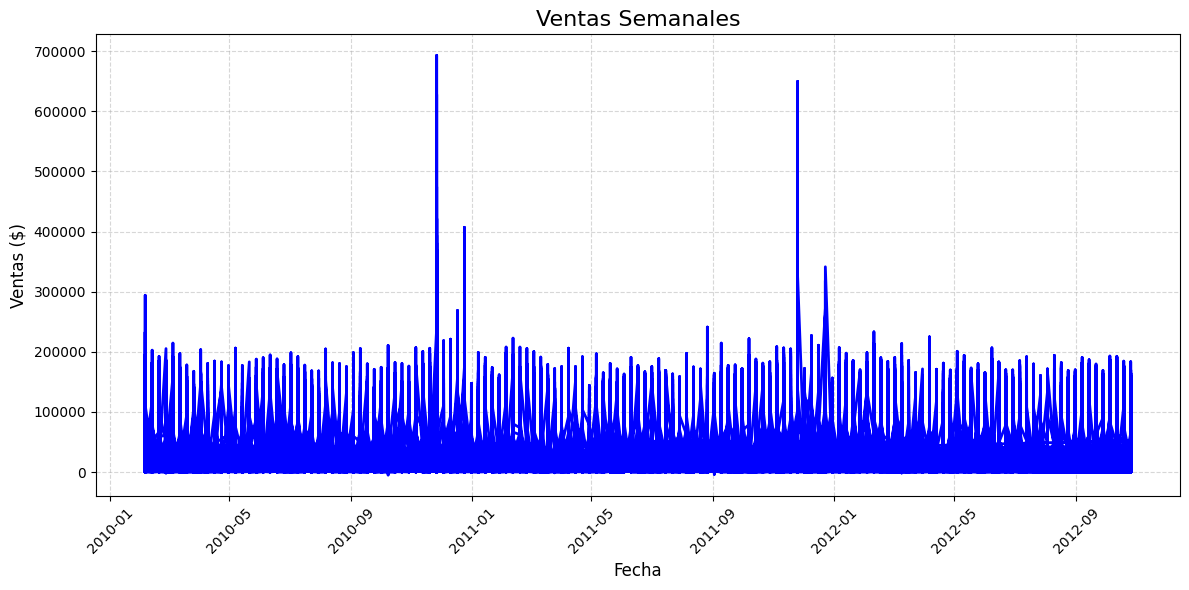

In [33]:
import matplotlib.pyplot as plt

# Crear un gráfico lineal básico
plt.figure(figsize=(12, 6))  # Ajustar tamaño del gráfico
plt.plot(df.index, df['Weekly_Sales'], color='blue', linewidth=2)

# Título y etiquetas de los ejes
plt.title('Ventas Semanales', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas ($)', fontsize=12)

# Ajustes adicionales
plt.grid(True, linestyle='--', alpha=0.5)  # Añadir cuadrícula
plt.xticks(rotation=45)  # Rotar etiquetas del eje X
plt.tight_layout()  # Ajustar márgenes automáticamente

# Mostrar el gráfico
plt.show()


In [43]:
df['Fuel_Price'].head()

Date
2010-02-05    2.572
2010-02-05    2.572
2010-02-05    2.572
2010-02-05    2.572
2010-02-05    2.572
Name: Fuel_Price, dtype: float64

<Axes: xlabel='Date'>

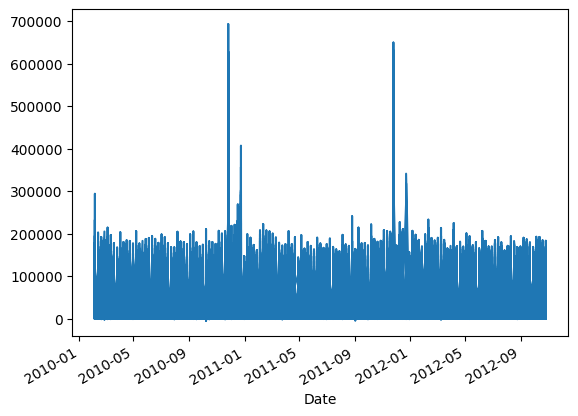

In [49]:
df['Weekly_Sales'].plot()